# Regularized Logistic Regression
## Function
For the definition of the function first we have to define the Segmoid function. <br>
$
\begin{equation}
\displaystyle
    Sigmoid(z) = \frac{1}{1 + e^{-z}}
\end{equation}
$
<br>
The function of the Logistic regression is :
$
\begin{equation}
\displaystyle
    f_{\overrightarrow{w}, b}(\overrightarrow{x}) = Sigmoid(\overrightarrow{w}.\overrightarrow{x} + b) = \frac{1}{1 + e^{-(\overrightarrow{w}.\overrightarrow{x} + b)}}
\end{equation}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd

In [2]:
def segmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [3]:
def predict(x, w, b):
    return segmoid(np.dot(x, w) + b)

## Cost function
The cost function is the average loss for each training input + the regularization term. Implementation of the cost function requires the definition of $Loss$ function which is: <br>
$
\begin{equation}
\displaystyle
    Loss(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}), y^{(i)}) = -y^{(i)} log\big(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)})\big) - (1 - y^{(i)}) log\big(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)})\big)
\end{equation}
$
<br>
The cost function is defined as such:<br>
$
\begin{equation}
\displaystyle
    J(\overrightarrow{w}, b) = \bigg(\frac{1}{m}\sum_{i=1}^{m}Loss\big(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}), y^{(i)}\big)\bigg) + \frac{\lambda}{2m}\sum_{j=1}^{n}w_{j}
\end{equation}
$
<br>
**$\lambda$ is regularization parameter** <br>
**$m$ and $n$ are number of rows(entries) and columns(features) respectively**

In [4]:
def loss(fwb_i, y):
    return -y * np.log(fwb_i) - (1 - y) * np.log(1 - fwb_i)

In [5]:
def cost(X, y, w, b, lambda_ = 0):
    m, n = X.shape
    loss_sum = 0
    for i in range(m):
        loss_sum += loss(predict(X[i], w, b), y[i])
    total_cost = loss_sum / m
    
    reg_sum = 0
    for j in range(n):
        reg_sum += w[j]
    total_cost += (lambda_ / (2 * m)) * reg_sum
    return total_cost

## Gradient Descent
We take the derivative of the cost function until it converges<br>
$
\begin{equation}
\displaystyle
    \text{Until converges}
    \begin{cases}
        w_j = w_j - \alpha\frac{d}{dw_j}J(\overrightarrow{w}, b)\\
        b = b - \alpha\frac{d}{db}J(\overrightarrow{w}, b)
    \end{cases}
\end{equation}
$
<br>
The derivative of terms are: <br>
$
\begin{equation}
\displaystyle
    \frac{d}{dw_j}J(\overrightarrow{w}, b) = \bigg(\frac{1}{m}\sum_{i=1}^{m}\big(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}) - y^{(i)}\big)x_{j}^{(i)}\bigg) + \frac{\lambda}{m}w_j\\
\displaystyle
    \frac{d}{db}J(\overrightarrow{w}, b) = \frac{1}{m}\sum_{i=1}^{m}\big(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}) - y^{(i)}\big)
\end{equation}
$

In [6]:
def gradient(X, y, w, b, lambda_ = 0):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = predict(X[i], w, b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i][j]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    for j in range(n):
        dj_dw[j] += (lambda_ / m) * w[j]
    
    return dj_dw, dj_db

In [7]:
def gradient_descent(X, y, init_w, init_b, alpha, cost_function, gradient_function, iterations = 1000, lambda_ = 0):
    w = copy.deepcopy(init_w)
    b = init_b
    
    for i in range(1, iterations + 1):
        dj_dw, dj_db = gradient_function(X, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % 1000 == 0:
            print(f'i: {i} w={w} b={b} cost={cost_function(X, y, w, b)}')
    return w, b

## Scale
Scaling data to be between 0 and 1 helps alot to train the data better<br>
$
\begin{equation}
\displaystyle
    \overrightarrow{x} = \frac{\overrightarrow{x}}{max_{\overrightarrow{x}}}
\end{equation}
$

In [8]:
def scale(X):
    abs_max = np.max(np.abs(X), axis=0)
    x_scale = X / abs_max
    return x_scale, abs_max

## Calculate the accuracy
With specification of a threshold we can choose either 1 or 0 to be the actual outcome of the prediction

In [9]:
def calc_accuracy(X, y, w_out, b_out, threshold=0.5):
    correct = 0
    m, n = X.shape
    for i in range(m):
        prediction = predict(X[i], w_out, b_out)
        if prediction >= threshold and y[i] == 1: correct += 1
        elif prediction < threshold and y[i] == 0: correct += 1
    return correct / m

## Plot
With contour plot, we are able to plot the decision boundry

In [10]:
def plot_data(X, points = 0.1):
    min1, max1 = X[:, 0].min() - 1, X[:, 1].max() + 1
    min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1grid = np.arange(min1, max1, points)
    x2grid = np.arange(min2, max2, points)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = np.reshape(r1, (-1, 1)), np.reshape(r2, (-1, 1))
    x_grid = np.hstack((r1, r2))
    
    return xx, yy, x_grid

## Training and Example
Let's try the algorithm for finding the chance of admission the could get

In [11]:
n_0 = 200; n_1 = 200
r = 9

x1 = np.random.random_sample(n_0)
x1 = x1 * 2 * r - r
temp1 = np.random.random_sample(int(np.ceil(n_1 / 2)))
temp1 = ((temp1 * 100) % 2 * r) + r
temp2 = np.random.random_sample(int(np.floor(n_1 / 2)))
temp2 = -(((temp2 * 100) % 2 * r) + r)
temp1 = np.concatenate((temp1, temp2), axis=0)
np.random.shuffle(temp1)
x1 = np.concatenate([x1, temp1], axis=0)
x1 = x1.astype(np.longdouble)

In [12]:
x2 = np.random.random_sample(n_0)
x2 = x2 * 2 * r - r
temp1 = np.random.random_sample(int(np.ceil(n_1 / 2)))
temp1 = ((temp1 * 100) % r * 2) + r
temp2 = np.random.random_sample(int(np.floor(n_1 / 2)))
temp2 = -(((temp2 * 100) % 2 * r) + r)
temp1 = np.concatenate((temp1, temp2), axis=0)
np.random.shuffle(temp1)
x2 = np.concatenate((x2, temp1), axis=0)
x2 = x2.astype(np.longdouble)

In [13]:
x_train = np.c_[x1 ** 2, x2 ** 2]
y_train = np.array([0 if i < n_0 else 1 for i in range(n_0 + n_1)])

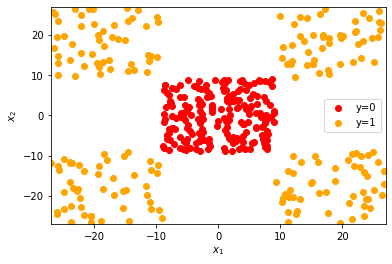

In [14]:
plt.figure()
plt.scatter(x1[:n_0], x2[:n_0], c='red', label='y=0')
plt.scatter(x1[n_0:], x2[n_0:], c='orange', label='y=1')
ax = plt.gca()
ax.set_xlim([-3 * r, 3 * r])
ax.set_ylim([-3 * r, 3 * r])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
ax.legend();

In [15]:
x_scale, amax = scale(x_train)
w_in = np.zeros_like(x_train[0])
b_in = 0
w_out, b_out = gradient_descent(x_scale, y_train, w_in, b_in, 1, cost, gradient, 10000)

i: 1000 w=[11.3575723  11.19528812] b=-3.957145969392563 cost=0.055803876477513566
i: 2000 w=[14.38708997 14.29761696] b=-4.738949385548261 cost=0.035942297882105984
i: 3000 w=[16.39106146 16.35196876] b=-5.2492941396821555 cost=0.02737389431722524
i: 4000 w=[17.9186666  17.91002521] b=-5.635823030574111 cost=0.02244168172839285
i: 5000 w=[19.16477643 19.17242208] b=-5.9495881257428564 cost=0.019187979074192795
i: 6000 w=[20.22311732 20.23708583] b=-6.214990631620647 cost=0.016859676284240243
i: 7000 w=[21.14649315 21.15966201] b=-6.445743713888975 cost=0.01510033648795538
i: 8000 w=[21.96777372 21.97495708] b=-6.650368676601255 cost=0.013717883137019297
i: 9000 w=[22.70889096 22.70625198] b=-6.834541322362098 cost=0.012599050853686778
i: 10000 w=[23.38524984 23.36991318] b=-7.002240828799014 cost=0.0116724472256181


In [16]:
print(f'The accuracy is {calc_accuracy(x_scale, y_train, w_out, b_out, 0.5)}')

The accuracy is 1.0


### Plotting the model
Below is a plot of the model

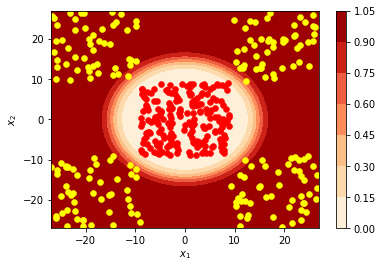

In [17]:
plt.figure()
ax = plt.gca()
ax.set_xlim([-3 * r, 3 * r])
ax.set_ylim([-3 * r, 3 * r])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
xx, yy, x_grid = plot_data(np.c_[x1, x2], 0.05)
x_grid = x_grid ** 2;
x_grid /= amax;
z_pre = predict(x_grid, w_out, b_out);
zz = z_pre.reshape(xx.shape);
plt.contourf(xx, yy, zz, cmap='OrRd');
plt.colorbar()
plt.scatter(x1[:n_0], x2[:n_0], c='red', label='y=0', lw=0.5);
plt.scatter(x1[n_0:], x2[n_0:], c='yellow', label='y=1', lw=0.5);

The end